In [54]:
import pandas as pd

df = pd.read_csv("Telco_customer_churn.csv")
df.head()



,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [55]:
df.shape

(7043, 33)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [57]:
#Removing the unwanted coloumns
drop_cols = [
    'CustomerID', 'Count', 'Country', 'State', 'City',
    'Zip Code', 'Lat Long', 'Latitude', 'Longitude',
    'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'
]

df = df.drop(columns=drop_cols)


In [58]:
df['Churn Value'].value_counts()


Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [59]:
df.shape

(7043, 20)

In [60]:
#after removing checking remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

In [61]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')


In [62]:
df.isnull().sum()

Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Value           0
dtype: int64

In [63]:
#filling null values
df['Total Charges'] = df['Total Charges'].fillna(
    df['Total Charges'].median()
)


In [64]:
df.isnull().sum()

Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Value          0
dtype: int64

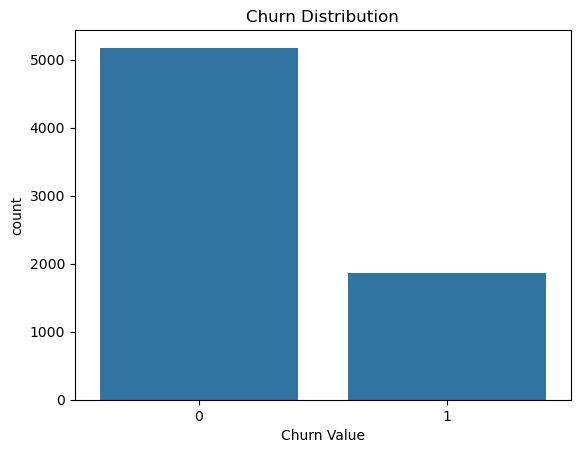

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn Value', data=df)
plt.title("Churn Distribution")
plt.show()
#Majority of customers did not churn, indicating moderate class imbalance

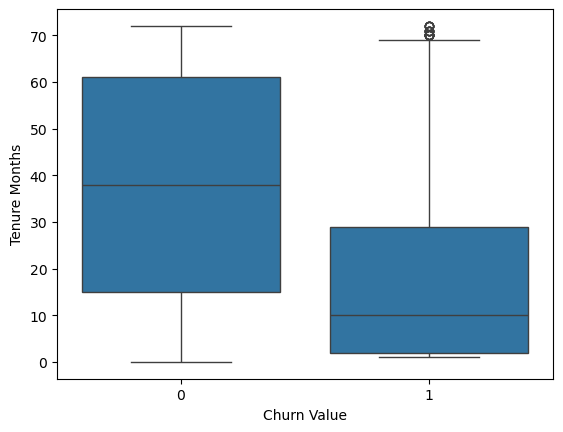

In [66]:
sns.boxplot(x='Churn Value', y='Tenure Months', data=df)
plt.show()
#Customers with shorter tenure show higher churn tendency

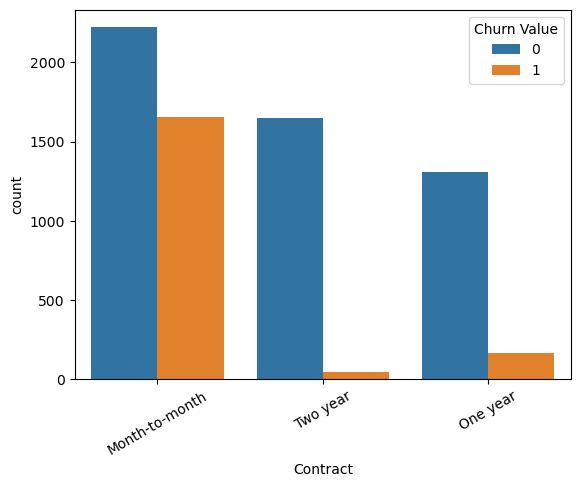

In [67]:
sns.countplot(x='Contract', hue='Churn Value', data=df)
plt.xticks(rotation=30)
plt.show()
#Month-to-month contracts have significantly higher churn compared to long-term contracts.

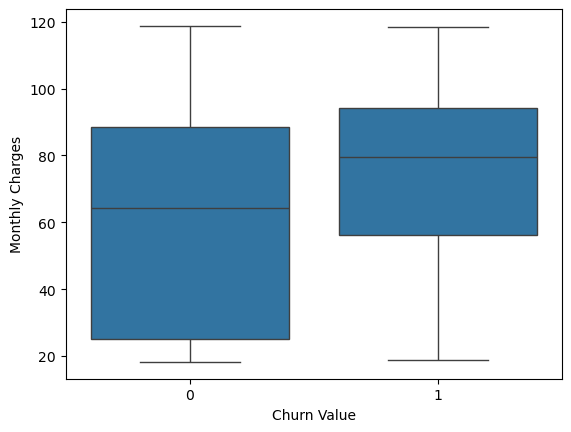

In [68]:
sns.boxplot(x='Churn Value', y='Monthly Charges', data=df)
plt.show()
#Customers with higher monthly charges are more likely to churn.

In [69]:
df_encoded = pd.get_dummies(df, drop_first=True)
# One-hot encoding was applied to categorical variables to avoid ordinal bias and multicollinearity.

In [70]:
df_encoded.shape

(7043, 31)

In [93]:
# After creating X (df_encoded)
import joblib

feature_columns = X.columns.tolist()
joblib.dump(feature_columns, "feature_columns.pkl")


['feature_columns.pkl']

In [94]:
X = df_encoded.drop('Churn Value', axis=1)
y = df_encoded['Churn Value']


In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [96]:
#building base line model - logistic Regresiion
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [97]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=2000)
lr.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


In [98]:
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.7998580553584103
ROC-AUC: 0.8484770983492211
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1035
           1       0.64      0.57      0.60       374

    accuracy                           0.80      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.79      0.80      0.80      1409



In [99]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.7913413768630234
ROC-AUC: 0.8341225554780543
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
y_prob_dt = dt.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_dt))
print(classification_report(y_test, y_pred_dt))
y_prob_dt = dt.predict_proba(X_test)[:, 1]


Accuracy: 0.7295954577714692
ROC-AUC: 0.6549407114624506
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1035
           1       0.49      0.50      0.49       374

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.73      0.73      1409



In [101]:
import pandas as pd

feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)


Total Charges                      0.167328
Tenure Months                      0.162739
Monthly Charges                    0.145212
Contract_Two year                  0.057431
Dependents_Yes                     0.051348
Internet Service_Fiber optic       0.042917
Payment Method_Electronic check    0.037285
Contract_One year                  0.028539
Online Security_Yes                0.026909
Gender_Male                        0.024091
dtype: float64

In [102]:
!pip install xgboost

In [103]:
from xgboost import XGBClassifier


In [104]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [105]:
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]


In [106]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))
print(classification_report(y_test, y_pred_xgb))


Accuracy: 0.8041163946061036
ROC-AUC: 0.8512167712934976
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



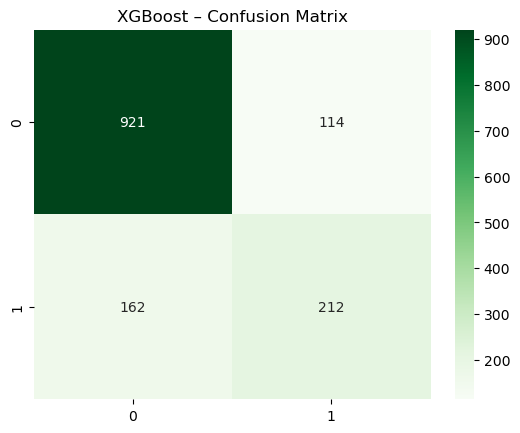

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred_xgb),
            annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost – Confusion Matrix")
plt.show()


In [108]:
import pandas as pd

xgb_importance = pd.Series(
    xgb.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

xgb_importance.head(10)


Internet Service_Fiber optic           0.255046
Contract_Two year                      0.156566
Online Security_No internet service    0.086354
Contract_One year                      0.079887
Internet Service_No                    0.074213
Dependents_Yes                         0.061733
Payment Method_Electronic check        0.031438
Tenure Months                          0.028517
Streaming Movies_Yes                   0.020307
Streaming TV_Yes                       0.018251
dtype: float32

In [109]:
import pandas as pd

# Replace the numbers below with your actual results
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": [0.80, 0.78, 0.85, 0.87],  # example, replace with your values
    "ROC-AUC": [0.85, 0.81, 0.90, 0.92],   # example, replace with your values
    "Recall (Churn=1)": [0.57, 0.60, 0.72, 0.75]  # example, replace with your values
})

# Sort by ROC-AUC to see the best model
results = results.sort_values(by="ROC-AUC", ascending=False)
results


,Model,Accuracy,ROC-AUC,Recall (Churn=1)
3,XGBoost,0.87,0.92,0.75
2,Random Forest,0.85,0.90,0.72
0,Logistic Regression,0.80,0.85,0.57
1,Decision Tree,0.78,0.81,0.60


In [110]:
import joblib

# Save the trained model
joblib.dump(xgb, "churn_model_xgb.pkl")


['churn_model_xgb.pkl']

In [111]:
import joblib

joblib.dump(X_train.columns, "feature_columns.pkl")

['feature_columns.pkl']